<a href="https://colab.research.google.com/github/helloitsdaksh/Minor-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
# Data manipulation lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Machine Learning lib
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Deep Learning lib
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [2]:
!nvidia-smi

Tue Sep 20 16:47:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Import Data 

In [3]:
!ls drive/MyDrive/Projected_impacts_datasheet_11.24.2021.xlsx

drive/MyDrive/Projected_impacts_datasheet_11.24.2021.xlsx


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
# Reading the dataset.
df = pd.read_excel("Projected_impacts_datasheet_11.24.2021.xlsx")

In [6]:
# Removing whitespaces from the dataset.
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

##Walk Through the Data

In [7]:
# Getting statistic information about the dataset.
df.describe()

,ID,latitude,longitude,Current Average Temperature (dC)_area_weighted,Current Average Temperature_point_coordinate (dC),Current Annual Precipitation (mm) _area_weighted,Current Annual Precipitation (mm) _point_coordinate,Future_Mid-point,Baseline_Mid-point,Local delta T,...,Climate impacts (%),Climate impacts relative to 2005,Climate impacts per dC (%),Climate impacts per decade (%),CO2 ppm,Publication year,Seasonal Precipitation change (mm) each study (local baseperiod),Base precipitation (annual) (mm) (local base period),Annual Preciptation change (%) (relative to local base),Base precipitation (seasonal) (mm) (local base period)
count,8703.00000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8703.000000,8702.000000,4392.000000,...,8703.000000,8703.000000,8703.000000,8703.000000,8538.000000,8703.000000,386.000000,1917.000000,366.000000,189.000000
mean,4352.00000,25.185816,32.340434,17.804514,17.252870,974.121895,962.207224,2055.435482,1986.571248,2.095515,...,-7.837566,-6.976058,-5.030708,-1.576233,514.895029,2014.038837,50.695555,862.841427,4.425903,668.146545
std,2512.48403,22.770279,69.821017,7.111171,8.282561,538.116430,693.195670,22.553559,13.148001,1.207587,...,24.807447,21.519675,17.988020,5.253247,114.081462,5.256125,157.213514,577.562989,7.624984,397.076905
min,1.00000,-38.416100,-122.000000,-8.371055,-8.371055,0.967242,0.967242,2000.000000,1965.000000,0.180000,...,-100.000000,-100.000000,-158.227848,-40.777778,330.000000,1984.000000,-335.800000,42.700000,-22.463600,154.000000
25%,2176.50000,14.058300,2.213750,11.848694,11.119357,605.289909,421.181280,2030.000000,1975.000000,1.127000,...,-17.634600,-13.103754,-7.704895,-2.678499,431.450000,2014.000000,-6.396000,467.000000,0.600000,381.000000
50%,4352.00000,32.403950,34.888800,17.663128,17.087790,907.985051,839.157841,2055.000000,1975.000000,1.807000,...,-4.592310,-2.782084,-1.944647,-0.701507,486.535320,2014.000000,4.195100,675.000000,4.790000,525.316500
75%,6527.50000,40.339900,90.356300,24.380180,24.863827,1264.254206,1254.342238,2080.000000,2002.000000,2.800000,...,5.025218,3.324415,2.181967,0.743806,550.500000,2017.000000,53.153200,1314.000000,7.000000,815.000000
max,8703.00000,61.924110,151.750000,30.500914,30.500914,3248.452253,3891.503190,2110.000000,2016.000000,6.600000,...,186.873000,135.907636,153.710247,26.153333,935.874370,2020.000000,791.000000,3300.000000,25.333333,1803.000000


In [8]:
# Getting basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 52 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                8703 non-null   float64
 1   Ref No                                                            4 non-null      object 
 2    Methods                                                          8703 non-null   object 
 3   Scale                                                             8703 non-null   object 
 4   Crop                                                              8703 non-null   object 
 5   Country                                                           8703 non-null   object 
 6   Site(location)                                                    2694 non-null   object 
 7   Region                           

In [9]:
# Removing non-essential features
clean_data = df.drop(df.columns[41:], axis=1)

In [10]:
# Removing non-essential features
clean_data = clean_data.drop(clean_data.columns[[1,6,19,21]],axis = 1)

In [11]:
# Finding the total number of null values in whole dataset.
clean_data.isna().sum()

ID                                                         0
 Methods                                                   0
Scale                                                      0
Crop                                                       0
Country                                                    0
Region                                                     0
latitude                                                  37
longitude                                                 37
Current Average Temperature (dC)_area_weighted            37
Current Average Temperature_point_coordinate (dC)         37
Current Annual Precipitation (mm) _area_weighted          37
Current Annual Precipitation  (mm) _point_coordinate      37
Future_Mid-point                                           0
Baseline_Mid-point                                         1
Time slice                                                 0
Climate scenario                                           0
Scenario source         

# Filling Null Values

## Guide to fill Null values in the dataset:
* You can use mean value to replace the missing values in case the data distribution is symmetric.
* Consider using median or mode with skewed data distribution.

### Handling `CO2 ppm` Null values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


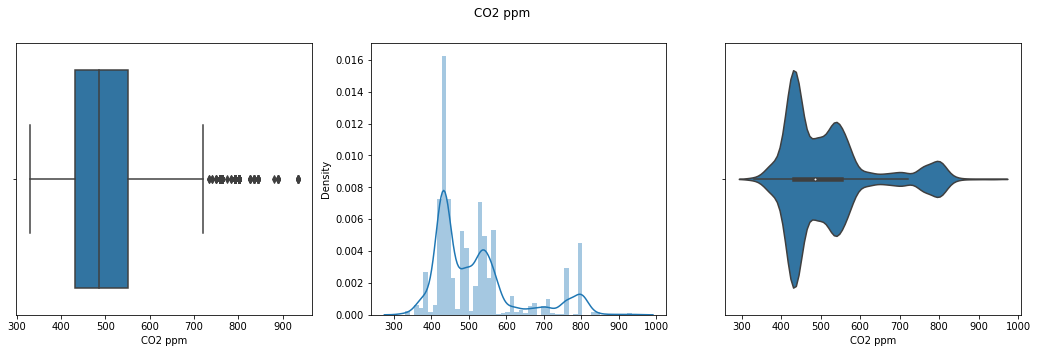

In [12]:
# Plotting various plots to get the insights
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
fig.suptitle('CO2 ppm')

sns.boxplot(ax=axes[0],    x = clean_data['CO2 ppm'])
sns.distplot(ax=axes[1],   x = clean_data['CO2 ppm'])
sns.violinplot(ax=axes[2], x = clean_data['CO2 ppm'])

In [13]:
# replacing Null values in `CO2 ppm` by the median
clean_data['CO2 ppm'].fillna(clean_data['CO2 ppm'].median(), inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


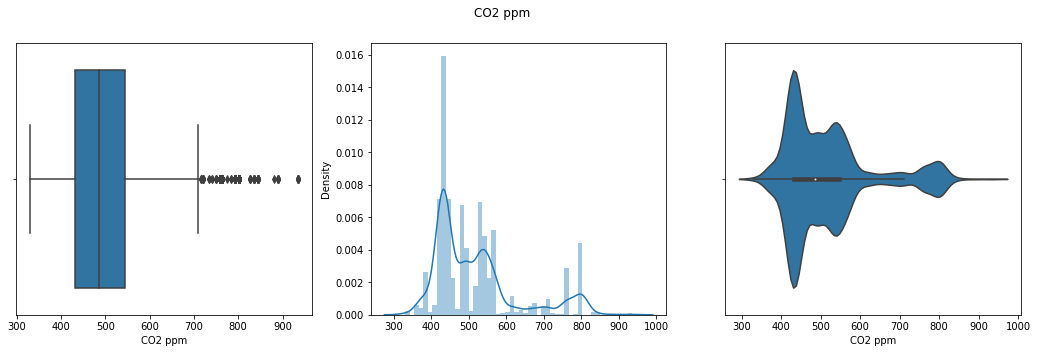

In [14]:
# Plotting various plots to verify the insights
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
fig.suptitle('CO2 ppm')

sns.boxplot(ax=axes[0],    x = clean_data['CO2 ppm'])
sns.distplot(ax=axes[1],   x = clean_data['CO2 ppm'])
sns.violinplot(ax=axes[2], x = clean_data['CO2 ppm'])

In [15]:
# finding null values in non-clean dataset.
df[df.columns[df.isnull().any()]].isnull().sum()

Ref No                                                              8699
Site(location)                                                      6009
latitude                                                              37
longitude                                                             37
Current Average Temperature (dC)_area_weighted                        37
Current Average Temperature_point_coordinate (dC)                     37
Current Annual Precipitation (mm) _area_weighted                      37
Current Annual Precipitation  (mm) _point_coordinate                  37
Baseline_Mid-point                                                     1
Local delta T                                                       4311
Local delta T from 2005                                               37
Annual Precipitation change each study  (mm)                        5149
 Annual Precipitation change  from 2005 (mm)                          37
Projected yield (t/ha)                             

In [16]:
# finding null values in non-clean dataset.
clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()

latitude                                                  37
longitude                                                 37
Current Average Temperature (dC)_area_weighted            37
Current Average Temperature_point_coordinate (dC)         37
Current Annual Precipitation (mm) _area_weighted          37
Current Annual Precipitation  (mm) _point_coordinate      37
Baseline_Mid-point                                         1
Local delta T from 2005                                   37
 Annual Precipitation change  from 2005 (mm)              37
Projected yield (t/ha)                                  5283
dtype: int64

In [17]:
# removing all 37 data entries with Null values and major info is not available.
clean_data = clean_data.dropna(subset=['latitude'])

In [18]:
# finding null values in non-clean dataset.
clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()

Baseline_Mid-point           1
Projected yield (t/ha)    5246
dtype: int64

### Handling `Baseline_Mid-point` Null values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


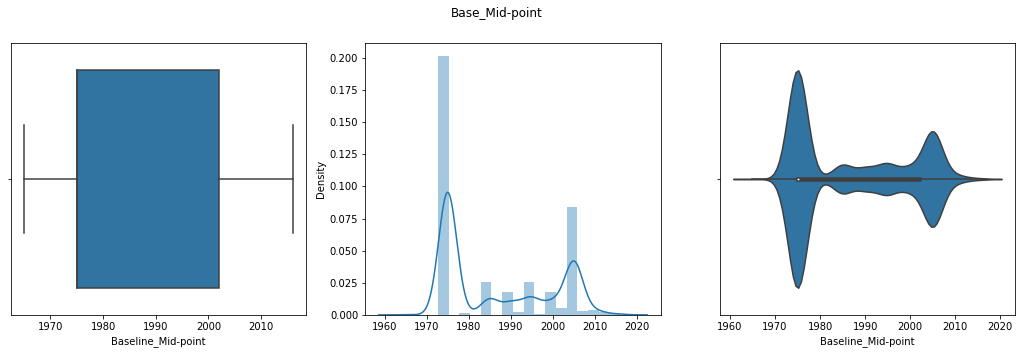

In [19]:
# Plotting various plots to get the insights
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
fig.suptitle('Base_Mid-point')

sns.boxplot(ax=axes[0],    x = clean_data['Baseline_Mid-point'])
sns.distplot(ax=axes[1],   x = clean_data['Baseline_Mid-point'])
sns.violinplot(ax=axes[2], x = clean_data['Baseline_Mid-point'])

In [20]:
# replacing Null values in `CO2 ppm` by the mean()
clean_data['Baseline_Mid-point'].fillna(clean_data['Baseline_Mid-point'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


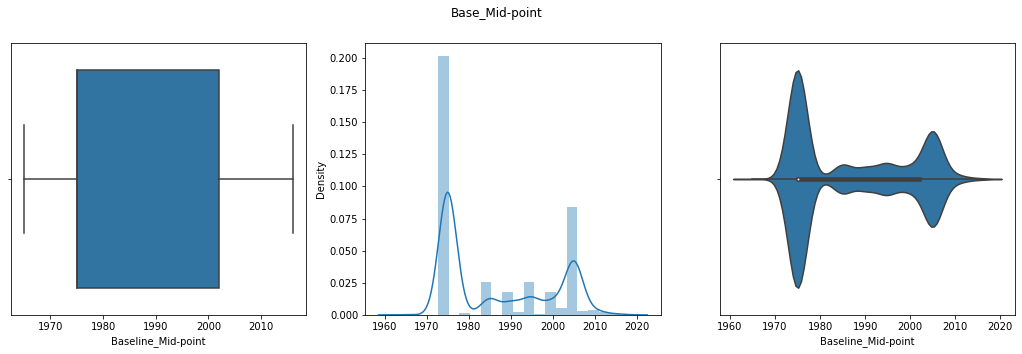

In [21]:
# Plotting various plots to verify the insights
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
fig.suptitle('Base_Mid-point')

sns.boxplot(ax=axes[0],    x = clean_data['Baseline_Mid-point'])
sns.distplot(ax=axes[1],   x = clean_data['Baseline_Mid-point'])
sns.violinplot(ax=axes[2], x = clean_data['Baseline_Mid-point'])

In [22]:
# Finding the null values in the cleaned_data
clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()

Projected yield (t/ha)    5246
dtype: int64

## Creating Test data and Train data 
* `Train data`: This data will have all features where `Projected yield (t/ha)`is not going to be Null.
* `Test data` :  This data will have all features where `Projected yield (t/ha)`is going to be Null.

In [23]:
# Creating test data by removing Rows where {Projected yield (t/ha)} is Null.
test_data = clean_data[clean_data['Projected yield (t/ha)'].isna()]

In [24]:
# Creating Train data where {Projected yield (t/ha)} is  not Null.
train_data = clean_data.dropna(subset=['Projected yield (t/ha)'])

In [25]:
# Getting shapes of data
train_data.shape,test_data.shape

((3420, 37), (5246, 37))

In [26]:
# Getting statitic information of train data
train_data.describe()

,ID,latitude,longitude,Current Average Temperature (dC)_area_weighted,Current Average Temperature_point_coordinate (dC),Current Annual Precipitation (mm) _area_weighted,Current Annual Precipitation (mm) _point_coordinate,Future_Mid-point,Baseline_Mid-point,Local delta T from 2005,Annual Precipitation change from 2005 (mm),Global delta T from pre-industrial period,Global delta T from 2005,Projected yield (t/ha),Climate impacts (%),Climate impacts relative to 2005,Climate impacts per dC (%),Climate impacts per decade (%),CO2 ppm
count,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000
mean,4687.339181,25.676630,22.614370,17.264956,16.791998,959.962104,930.299054,2055.092105,1996.754840,1.699006,32.698388,2.260822,1.470822,4.353767,-15.140432,-14.625377,-11.880689,-3.554590,515.581736
std,2835.329013,23.266569,74.893768,6.875179,7.966570,560.104015,671.600860,20.264484,11.632417,0.975629,92.275423,0.778302,0.778302,2.646227,29.394006,28.053946,25.358315,7.227903,101.437263
min,1.000000,-38.416100,-122.000000,-3.846288,-8.371055,1.764165,1.764165,2015.000000,1974.000000,0.100962,-130.011200,0.870000,0.080000,0.000000,-100.000000,-100.000000,-158.227848,-40.777778,360.000000
25%,966.750000,14.058300,-51.925300,11.788200,10.606013,570.196723,421.181280,2035.000000,1990.000000,0.967000,-8.034400,1.728000,0.938000,2.166074,-28.685150,-24.837848,-17.248711,-5.540585,441.720800
50%,5380.500000,32.760000,31.165600,16.554688,16.520588,838.617235,805.450052,2050.000000,2005.000000,1.432746,12.782000,2.094000,1.304000,4.137600,-11.200000,-9.287932,-5.615714,-1.946773,487.150000
75%,7307.250000,40.463700,80.771800,23.473879,24.380180,1286.601796,1254.342238,2080.000000,2005.000000,2.104000,53.909661,2.593000,1.803000,6.481200,2.878338,2.418272,1.499915,0.487198,545.350000
max,8666.000000,61.924110,149.790000,29.747280,29.747280,3010.707349,3891.503190,2100.000000,2016.000000,5.550000,892.166667,5.350000,4.560000,13.820000,113.663879,89.714286,153.710247,26.153333,935.874370


#

In [27]:
train_data.head()

,ID,Methods,Scale,Crop,Country,Region,latitude,longitude,Current Average Temperature (dC)_area_weighted,Current Average Temperature_point_coordinate (dC),...,CO2 ppm,Fertiliser,Irrigation,Cultivar,Soil organic matter management,Planting time,Tillage,Others,Adaptation,Adaptation type
0,1.0,SCOPUS-NewSearch,Regional,Maize,Pakistan,Asia,31.4167,73.0911,25.454252,25.454252,...,564.31311,No,No,No,No,No,No,No,No,No
1,2.0,SCOPUS-NewSearch,Regional,Maize,Pakistan,Asia,31.4167,73.0911,25.454252,25.454252,...,564.31311,Yes,No,Yes,No,Yes,No,Yes,Yes,Combined
2,3.0,SCOPUS-NewSearch,Regional,Maize,United States,North America,43.2705,-104.1080,10.191208,10.191208,...,570.51669,No,No,No,No,No,No,No,No,No
3,4.0,SCOPUS-NewSearch,Regional,Maize,United States,North America,43.2705,-104.1080,10.191208,10.191208,...,570.51669,No,No,No,No,No,No,Yes,Yes,Others
6,7.0,SCOPUS-NewSearch,Regional,Maize,China,Asia,37.4000,115.2000,14.786566,14.786566,...,378.81250,No,No,No,No,No,No,No,No,No


#convert Categorical variable with Numerical values

In [28]:
# Replacing all Yes by 1 and No by 0
train_data = train_data.replace({"Yes" : 1, "No" : 0})
test_data = test_data.replace({"Yes" : 1, "No" : 0,})

In [29]:
# SInce there are more things in Adaptation type we replace back NO and YES particularly back by 0 and 1.
train_data['Adaptation type'] = train_data['Adaptation type'].replace({1 : 'Yes',0 : 'No'})
test_data['Adaptation type'] = test_data['Adaptation type'].replace({1 : 'Yes ',0 : 'No'})

In [30]:
train_data.shape,test_data.shape

((3420, 37), (5246, 37))

In [31]:
# Printing unique values in Adaptation type
print(train_data["Adaptation type"].unique())
print(test_data["Adaptation type"].unique())

['No' 'Combined' 'Others' 'Planting date' 'Tillage' 'Fertiliser'
 'Cultivar' 'Soil organic matter management' 'Irrigation']
['No' 'Cultivar' 'Irrigation' 'Fertiliser' 'Combined' 'Others'
 'Planting date']


In [32]:
print(train_data["Projected yield (t/ha)"].dtype)

float64


In [33]:
# Using Label Encoder to convert strings into numerical values
feature_col = ['Scale','Crop', 'Country','Region',' Methods','Time slice','Climate scenario','Scenario source','Adaptation type']
le = LabelEncoder()
for col in feature_col:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

In [34]:
train_data.info(),train_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3420 entries, 0 to 8665
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    3420 non-null   float64
 1    Methods                                              3420 non-null   int64  
 2   Scale                                                 3420 non-null   int64  
 3   Crop                                                  3420 non-null   int64  
 4   Country                                               3420 non-null   int64  
 5   Region                                                3420 non-null   int64  
 6   latitude                                              3420 non-null   float64
 7   longitude                                             3420 non-null   float64
 8   Current Average Temperature (dC)_area_weighted        3420

(None,
                 ID      Methods        Scale         Crop      Country  \
 count  3420.000000  3420.000000  3420.000000  3420.000000  3420.000000   
 mean   4687.339181     0.804971     0.726608     1.410234    39.128947   
 std    2835.329013     0.396281     0.863510     1.326650    23.238618   
 min       1.000000     0.000000     0.000000     0.000000     0.000000   
 25%     966.750000     1.000000     0.000000     0.000000    19.000000   
 50%    5380.500000     1.000000     0.000000     1.000000    35.000000   
 75%    7307.250000     1.000000     2.000000     3.000000    61.000000   
 max    8666.000000     1.000000     3.000000     3.000000    76.000000   
 
             Region     latitude    longitude  \
 count  3420.000000  3420.000000  3420.000000   
 mean      2.328655    25.676630    22.614370   
 std       1.800084    23.266569    74.893768   
 min       0.000000   -38.416100  -122.000000   
 25%       1.000000    14.058300   -51.925300   
 50%       1.000000   

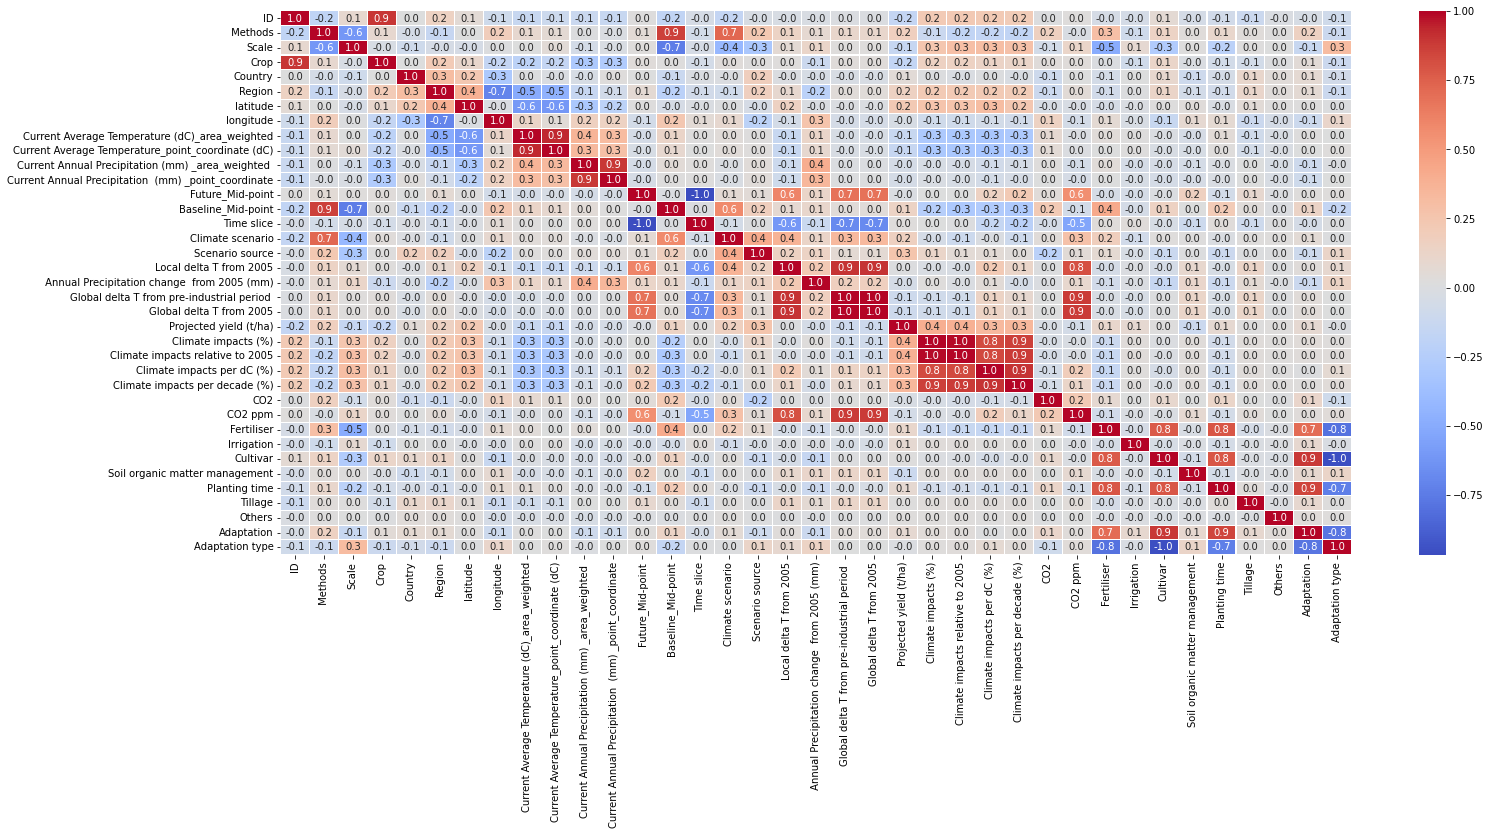

In [35]:
plt.figure(figsize=(24,10))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [36]:
train_data.drop(['ID'],axis = 1,inplace = True)
test_data.drop(['ID'],axis = 1,inplace = True)

In [37]:
# creating X(data on which the model will be trained) and y(feature which will be predicted)
X = train_data.drop(columns=['Projected yield (t/ha)'], axis=1)
X_valid = test_data.drop(columns=['Projected yield (t/ha)'], axis=1)
y = train_data['Projected yield (t/ha)']

In [38]:
X.shape,X_valid.shape,y.shape

((3420, 35), (5246, 35), (3420,))

In [39]:
y = np.expand_dims(y, axis=1)

In [40]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
X_valid = sc_X.fit_transform(X_valid)
y = sc_y.fit_transform(y)

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

## Support Vector Regression

In [42]:
SV_regressor= SVR()
SV_regressor.fit(X_train,y_train)

y_predsv=SV_regressor.predict(X_test)
# y_pred = sc_y.inverse_transform(y_pred)

print(f"r2_score %: {r2_score(y_test,y_predsv)}")
sv_results = r2_score(y_test,y_predsv)
print(sc_y.inverse_transform(np.expand_dims(y_predsv, axis=1)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_score %: 0.6408369214726818
[[4.19704592]
 [7.98098178]
 [2.59252957]
 ...
 [2.2057925 ]
 [3.84106129]
 [2.64409076]]


In [43]:
y_valid_sv = SV_regressor.predict(X_valid)
print(f'This is X_valid: {X_valid, X_valid.shape} \n')
print(f'This is y_valid: {y_valid_sv, y_valid_sv.shape}\n')
yield_per_hectare = sc_y.inverse_transform(np.expand_dims(y_predsv, axis=1))
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35)) 

This is y_valid: (array([ 0.2801863 ,  0.28300598,  0.39193866, ..., -0.95817812,
       -1.0430358 , -0.50188597]), (5246,))

This is yield_per_hectare: [[4.19704592]
 [7.98098178]
 [2.59252957]
 ...
 [2.2057925 ]
 [3.84106129]
 [2.64409076]]


## Linear Regressor

In [44]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
# y_pred = sc_y.inverse_transform(y_pred)

print(f"r2_score %: {r2_score(y_test,y_pred)}")
lr_results = r2_score(y_test,y_pred)
print(sc_y.inverse_transform(y_pred))

r2_score %: 0.39840583947572983
[[3.57078419]
 [7.4215899 ]
 [2.93285663]
 ...
 [2.38087663]
 [3.92601516]
 [3.20278309]]


In [45]:
y_valid_lr = regressor.predict(X_valid)
print(f'This is X_valid: {X_valid, X_valid.shape}\n')
print(f'This is y_valid: {y_valid_lr, y_valid_lr.shape}\n')
yield_per_hectare = sc_y.inverse_transform(y_valid_lr)
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))

This is y_valid: (array([[ 0.23772365],
       [ 0.28130805],
       [ 0.34290021],
       ...,
       [-0.87274457],
       [-0.82962633],
       [-0.31750901]]), (5246, 1))

This is yield_per_hectare: [[4.9827462 ]
 [5.09806355]
 [5.26102654]
 ...
 [2.04462499]
 [2.15870896]
 [3.51368943]]


## Random Forest Regressor

In [46]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state =42)
rf_regressor.fit(X_train,y_train)
y_predrf = rf_regressor.predict(X_test)

print(f"r2_score: {r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(np.expand_dims(y_predrf, axis=1)))}")
rf_results = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(np.expand_dims(y_predrf, axis=1)))
print(sc_y.inverse_transform(np.expand_dims(y_predrf, axis=1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


r2_score: 0.9145103351827222
[[4.44956474]
 [6.72735867]
 [2.56290743]
 ...
 [1.74594133]
 [3.82625181]
 [0.98304298]]


In [47]:
y_valid_rf = rf_regressor.predict(X_valid)
yield_per_hectare = sc_y.inverse_transform((np.expand_dims(y_valid_rf, axis=1)))
print(f'This is X_valid: {X_valid, X_valid.shape}\n')
print(f'This is y_valid: {y_valid_rf, y_valid_rf.shape}\n')
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))

This is y_valid: (array([ 0.09869667,  0.02484575,  0.24967206, ..., -0.17181182,
       -0.91767493, -0.23187651]), (5246,))

This is yield_per_hectare: [[4.61490307]
 [4.41950535]
 [5.01435977]
 ...
 [3.89918087]
 [1.92574645]
 [3.74025932]]


##Decision Tree

In [48]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)
y_preddt = dt_regressor.predict(X_test)

print(f"r2_score: {r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(np.expand_dims(y_preddt, axis=1)))}")
dt_results = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(np.expand_dims(y_preddt, axis=1)))
print(sc_y.inverse_transform(np.expand_dims(y_preddt, axis=1)))

r2_score: 0.8515713803732204
[[3.255     ]
 [6.5898    ]
 [2.2256    ]
 ...
 [1.4871    ]
 [2.7907    ]
 [0.55379158]]


In [49]:
y_valid_dt = dt_regressor.predict(X_valid)
yield_per_hectare = sc_y.inverse_transform((np.expand_dims(y_valid_dt, axis=1)))

print(f'This is X_valid: {X_valid, X_valid.shape}\n')
print(f'This is y_valid: {y_valid_dt, y_valid_dt.shape}\n')
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))

This is y_valid: (array([ 1.43256303,  1.43256303,  0.9166536 , ..., -0.39930429,
       -0.01714672, -0.47386368]), (5246,))

This is yield_per_hectare: [[8.1441    ]
 [8.1441    ]
 [6.7790862 ]
 ...
 [3.29727222]
 [4.3084    ]
 [3.1       ]]


## USING ENCODER ANN

In [50]:
# AutoEncoder Model Preparation
n_inputs = X.shape[1]
# define encoder
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [51]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [52]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,y_test))

Epoch 1/50
150/150 - 3s - loss: 0.8263 - val_loss: 0.6429 - 3s/epoch - 19ms/step
Epoch 2/50
150/150 - 1s - loss: 0.5833 - val_loss: 0.5289 - 796ms/epoch - 5ms/step
Epoch 3/50
150/150 - 1s - loss: 0.5396 - val_loss: 0.5035 - 781ms/epoch - 5ms/step
Epoch 4/50
150/150 - 1s - loss: 0.5123 - val_loss: 0.4660 - 778ms/epoch - 5ms/step
Epoch 5/50
150/150 - 1s - loss: 0.4754 - val_loss: 0.4372 - 762ms/epoch - 5ms/step
Epoch 6/50
150/150 - 1s - loss: 0.4541 - val_loss: 0.4202 - 788ms/epoch - 5ms/step
Epoch 7/50
150/150 - 1s - loss: 0.4274 - val_loss: 0.4167 - 793ms/epoch - 5ms/step
Epoch 8/50
150/150 - 1s - loss: 0.4246 - val_loss: 0.3926 - 1s/epoch - 7ms/step
Epoch 9/50
150/150 - 1s - loss: 0.3983 - val_loss: 0.3695 - 1s/epoch - 7ms/step
Epoch 10/50
150/150 - 1s - loss: 0.3845 - val_loss: 0.3513 - 833ms/epoch - 6ms/step
Epoch 11/50
150/150 - 1s - loss: 0.3708 - val_loss: 0.3527 - 798ms/epoch - 5ms/step
Epoch 12/50
150/150 - 1s - loss: 0.3436 - val_loss: 0.3418 - 765ms/epoch - 5ms/step
Epoch 13/

In [53]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# encode the valid data
X_valid_encode = encoder.predict(X_valid)

In [54]:
# create ANN model
model_encoded = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model_encoded.add(Dense(units=100, input_dim=18, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model_encoded.add(Dense(units=50, kernel_initializer='normal', activation='relu'))
model_encoded.add(Dense(units=25, kernel_initializer='normal', activation='tanh'))
model_encoded.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model_encoded.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model_encoded.compile(loss='mean_squared_error', optimizer='adam',metrics=['MeanAbsoluteError'])
 
# Fitting the ANN to the Training set
model_encoded.fit(X_train_encode, y_train , epochs = 100, verbose=1)

Epoch 1/100
75/75 [==============================] - 1s 4ms/step - loss: 0.7865 - mean_absolute_error: 0.7398
Epoch 2/100
75/75 [==============================] - 0s 5ms/step - loss: 0.2943 - mean_absolute_error: 0.4178
Epoch 3/100
75/75 [==============================] - 0s 4ms/step - loss: 0.1674 - mean_absolute_error: 0.3086
Epoch 4/100
75/75 [==============================] - 0s 4ms/step - loss: 0.1358 - mean_absolute_error: 0.2779
Epoch 5/100
75/75 [==============================] - 0s 4ms/step - loss: 0.1189 - mean_absolute_error: 0.2584
Epoch 6/100
75/75 [==============================] - 0s 4ms/step - loss: 0.1120 - mean_absolute_error: 0.2481
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 0.1014 - mean_absolute_error: 0.2362
Epoch 8/100
75/75 [==============================] - 0s 4ms/step - loss: 0.0970 - mean_absolute_error: 0.2292
Epoch 9/100
75/75 [==============================] - 0s 7ms/step - loss: 0.0914 - mean_absolute_error: 0.2220
Epoch 10/1

In [55]:
y_predann=model.predict(X_test_encode)
print(f"r2_score: {r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_predann))}")
ann_results = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_predann))
print(sc_y.inverse_transform(y_predann))

r2_score: 0.9349547563557777
[[5.117229  ]
 [6.6385055 ]
 [2.4130037 ]
 ...
 [2.054557  ]
 [3.4959247 ]
 [0.89562064]]


In [56]:
y_valid_ann = model.predict(X_valid_encode)
print(f'This is X_valid: {X_valid, X_valid.shape}\n')
print(f'This is y_valid: {y_valid_ann, y_valid_ann.shape}\n')
yield_per_hectare = sc_y.inverse_transform(y_valid_ann)
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))

This is y_valid: (array([[-0.09000009],
       [-0.21842307],
       [ 1.2434957 ],
       ...,
       [-0.773089  ],
       [-0.9919613 ],
       [-0.52788645]], dtype=float32), (5246, 1))

This is yield_per_hectare: [[4.1156416]
 [3.775855 ]
 [7.643858 ]
 ...
 [2.3082976]
 [1.7291967]
 [2.9570644]]


## Normal ANN

In [57]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=1024, input_dim=35, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=16, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['mean_absolute_error'])
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train, epochs = 100, verbose=1)

Epoch 1/100
75/75 [==============================] - 2s 6ms/step - loss: 0.6971 - mean_absolute_error: 0.6737
Epoch 2/100
75/75 [==============================] - 0s 4ms/step - loss: 0.4036 - mean_absolute_error: 0.4843
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 0.3036 - mean_absolute_error: 0.4167
Epoch 4/100
75/75 [==============================] - 0s 5ms/step - loss: 0.2356 - mean_absolute_error: 0.3613
Epoch 5/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2006 - mean_absolute_error: 0.3301
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1634 - mean_absolute_error: 0.2940
Epoch 7/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1388 - mean_absolute_error: 0.2704
Epoch 8/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1311 - mean_absolute_error: 0.2620
Epoch 9/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1103 - mean_absolute_error: 0.2317
Epoch 10/1

In [58]:
y_predNN=model.predict(X_test)


print(f"r2_score: {r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_predNN))}")
NN_results = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_predNN))
print(sc_y.inverse_transform(y_predNN))

r2_score: 0.9151389033567406
[[5.231247  ]
 [8.03964   ]
 [2.586827  ]
 ...
 [1.7701644 ]
 [4.6978836 ]
 [0.61448747]]


In [59]:
tf.convert_to_tensor(X_valid)

<tf.Tensor: shape=(5246, 35), dtype=float64, numpy=
array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]])>

In [60]:
y_valid = model.predict(X_valid)
print(f'This is X_valid: {X_valid, X_valid.shape}\n')
print(f'This is y_valid: {y_valid, y_valid.shape}\n')
yield_per_hectare = sc_y.inverse_transform(y_valid)
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))

This is y_valid: (array([[ 0.2217187 ],
       [ 0.30768207],
       [ 1.0820391 ],
       ...,
       [-0.9269119 ],
       [-1.2017617 ],
       [-1.4470932 ]], dtype=float32), (5246, 1))

This is yield_per_hectare: [[4.9403996]
 [5.167845 ]
 [7.21667  ]
 ...
 [1.901307 ]
 [1.1740984]
 [0.5249904]]


# Comparing Models
* Support Vector Regression
* Linear Regression
* Random Forest Regression
* Decision Tree Regression
* Using Encoder ANN
* Normal ANN


In [61]:
# creating the dataset
data = {'Support Vector Regression':round(sv_results,2),
        'Logistic Regression':round(lr_results,2),
        'Random Forest Classification':round(rf_results,2),
        'Decision Tree':round(dt_results,2),
        'ANN using encoders':round(ann_results,2),
        'ANN without encoders':round(NN_results,2)}
Algo = list(data.keys())
values = list(data.values())

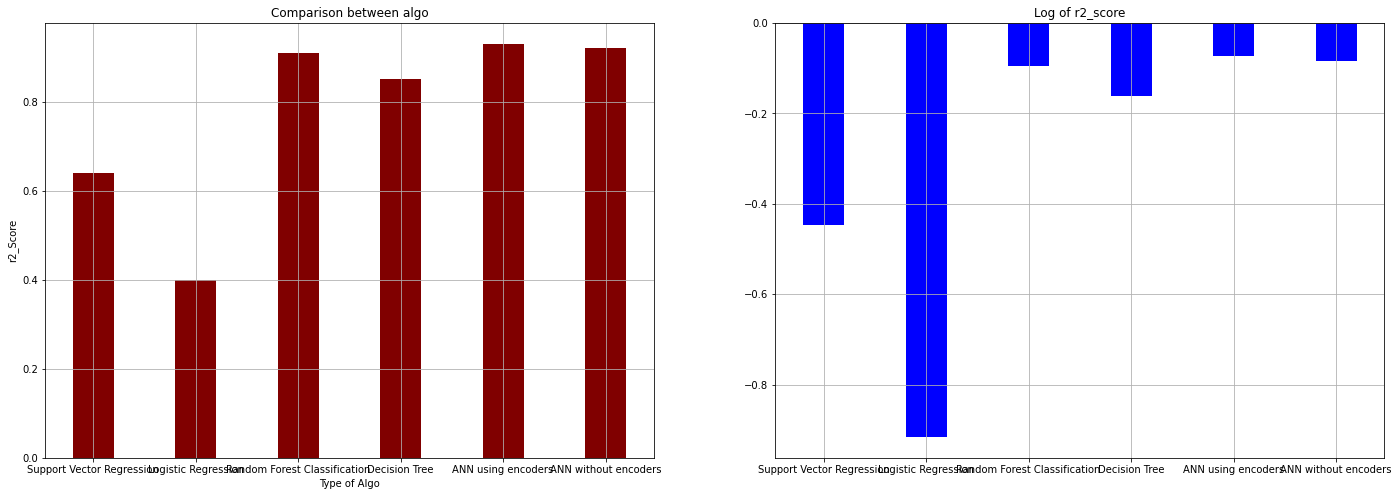

In [62]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)

plt.grid()
plt.bar(Algo, values, color ='maroon',
        width = 0.4) 
plt.xlabel("Type of Algo")
plt.ylabel("r2_Score")
plt.title("Comparison between algo")

plt.subplot(1, 2, 2)
plt.grid()
plt.bar(Algo, np.log(values), color ='blue',
        width = 0.4)
plt.title("Log of r2_score")

plt.show()
